<a href="https://colab.research.google.com/github/vnevzorovaa/cs102/blob/homework07/nevzorova_R_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# проверка
a <- 2
print(a)

[1] 2


1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [ ]:
unzip(zipfile="/content/music_genre.csv.zip", exdir=".")

In [ ]:
# 1
ds <- read.csv('/content/music_genre.csv', header=TRUE)

In [ ]:
# 2

df <- ds[sample(nrow(ds), 20000),]
nrow(df)

[1] 20000

In [ ]:
# 3

print(df[duplicated(df),][0])
dt <- unique(df)
print(dt[duplicated(dt),][0])

data frame with 0 columns and 1 row
data frame with 0 columns and 0 rows


In [ ]:
# 4

nrow(dt[dt$artist_name == 'empty_field',])
dt <- dt[!dt$artist_name == 'empty_field',]
nrow(dt[dt$artist_name == 'empty_field',])

[1] 952

[1] 0

### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [ ]:
# 1

prop.table(table(dt$music_genre))*100


              Alternative        Anime        Blues    Classical      Country 
 0.005250171 10.017325563 10.064577099  9.891321468  9.964823857  9.975324198 
  Electronic      Hip-Hop         Jazz          Rap         Rock 
10.164330341 10.043576416  9.985824539 10.033076075  9.854570274 

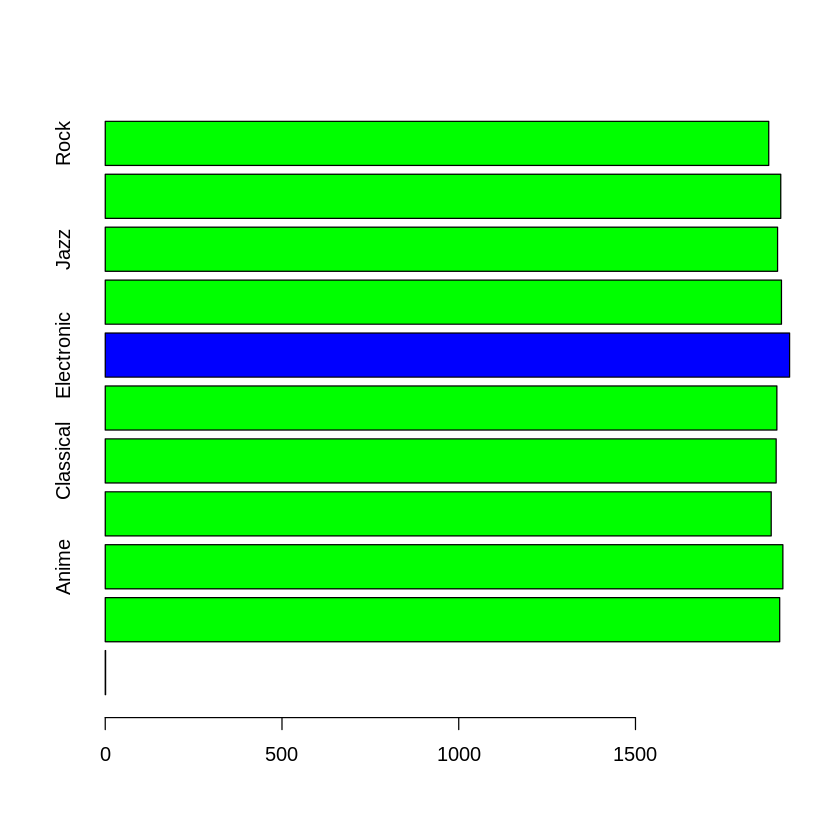

In [ ]:
# 2

x <- table(dt$music_genre)
colors <- c("green", "blue")[1+(x==max(x))]
barplot(x, col=cols, horiz=TRUE)

In [ ]:
# 3
agg <- aggregate(dt$danceability, by=list(Genre=dt$music_genre), FUN=mean)

agg[]

Genre,x
<chr>,<dbl>
,NA
Alternative,0.5411258
Anime,0.4710620
Blues,0.5245711
Classical,0.3035782
Country,0.5775189
Electronic,0.6189174
Hip-Hop,0.7124192
Jazz,0.5822978


In [ ]:
library(ggplot2)

In [ ]:
# genres = unique(df$music_genre)
# genres = genres[genres != ""]
# genres

[1] "Rap"         "Alternative" "Anime"       "Classical"   "Electronic" 
 [6] "Jazz"        "Hip-Hop"     "Rock"        "Blues"       "Country"

In [ ]:
# 4
genres <- unique(df$music_genre)
genres <- genres[genres != ""]

min_maj <- c()
amount <- c()

for (genre in genres) {
  temp <- subset(df, music_genre == genre)
  
  am_maj <- sum(temp$mode == 'Major', na.rm = TRUE)
  am_min <- sum(temp$mode == 'Minor', na.rm = TRUE)
  
  min_maj <- c(min_maj, ifelse(am_maj > am_min, "Major", "Minor"))
  amount <- c(amount, ifelse(am_maj > am_min, am_maj, am_min))
}

df_ <- data.frame(genre = as.character(genres), mode = as.character(min_maj), amount = as.numeric(amount))
df_


genre,mode,amount
<chr>,<chr>,<dbl>
Rap,Major,1103
Alternative,Major,1268
Anime,Major,1267
Classical,Major,1353
Electronic,Major,1080
Jazz,Major,1020
Hip-Hop,Major,1127
Rock,Major,1476
Blues,Major,1443


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [167]:
artists = unique(df$artist_name)
track <- list()
for (artist in artists) {
  track <- append(track, nrow(df[df$artist_name == artist, ]))
}
n_list_artist = list(artist = artists, amount = track_amount)
df_art <- as.data.frame(do.call(cbind, nested_list_artist))
df_art <- transform(df_art, artist = as.character(artist), amount = as.numeric(c(amount)))
print(df_art[which.max(df_art$amount), ])
print(df_art[which.min(df_art$amount), ])

       artist amount
2 empty_field    952
        artist amount
7 Gidon Kremer      1


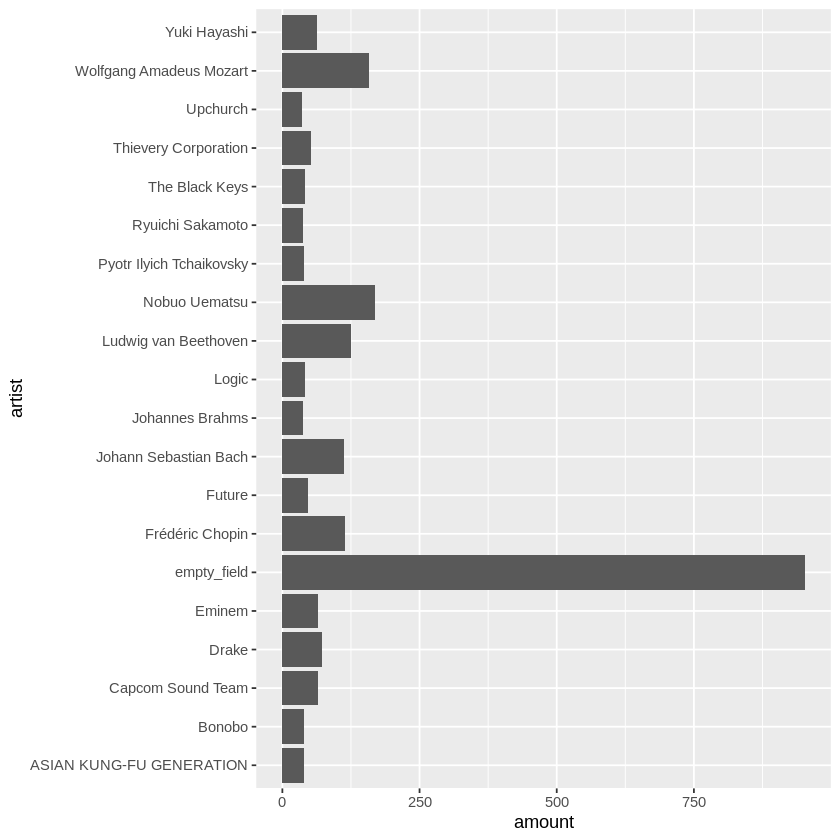

In [134]:
df_art_sorted <- df_art[order(df_art$amount, decreasing = TRUE), ]
df_art_top <- df_art_sorted[1:20, ]

ggplot(df_art_top, aes(x = artist, y = amount)) +
  geom_bar(stat = "identity") +
  coord_flip()

### Задание 4
1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)

corrplot 0.92 loaded



In [140]:
library(dplyr)
library(tidyr)

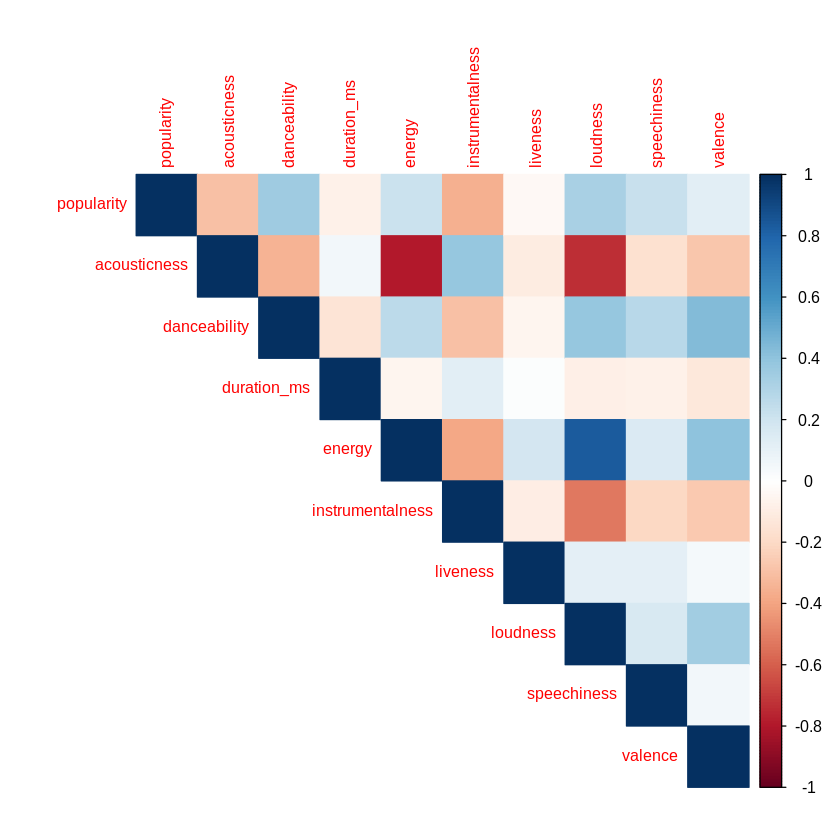

In [142]:
selected_cols <- c("popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence")
df_selected <- df[, selected_cols]
df_clean <- df_selected %>% drop_na()
df_clean <- df_clean %>% mutate_all(as.numeric)
cor_matrix <- cor(df_clean)
corrplot(cor_matrix, method = "color", type = "upper", tl.cex = 0.8)




### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?


In [143]:
df_p <- df[, c("popularity", "music_genre")]
df_p$popularity <- as.numeric(df_p$popularity)
df_p <- na.omit(df_p)

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


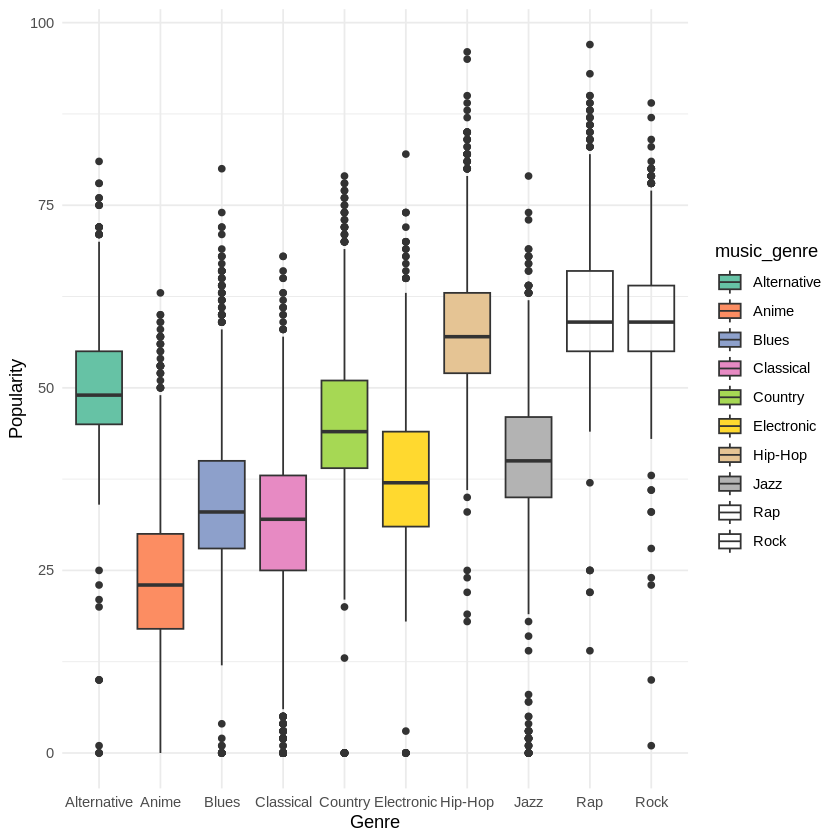

In [145]:
df_p$music_genre <- factor(df_p$music_genre)

ggplot(df_p, aes(x = music_genre, y = popularity, fill = music_genre)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set2") +
  labs(x = "Genre", y = "Popularity") +
  theme_minimal()

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого 
популярного исполнителя. Диаграмма должна быть одна.

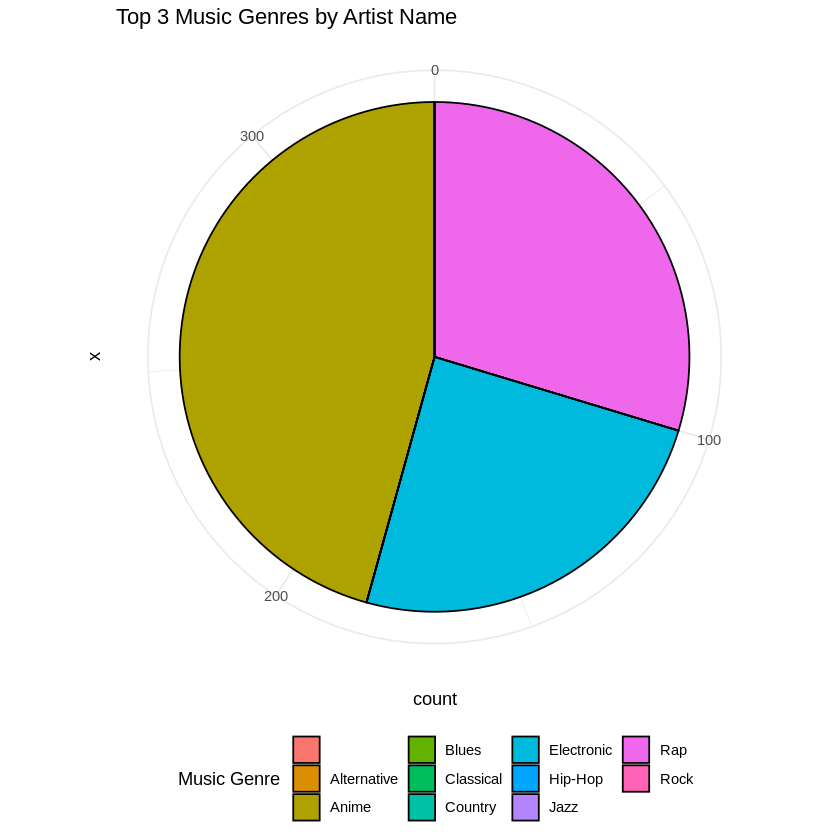

In [148]:
top3_genres <- names(sort(table(df$music_genre), decreasing = TRUE))[1:3]
l_true_false <- df$music_genre %in% top3_genres

genres_artists <- subset(df, select = c("artist_name", "music_genre"))
genres_artists$count <- l_true_false
genres_artists_count <- aggregate(count ~ artist_name + music_genre, data = genres_artists, FUN = sum)
genres_artists_count <- genres_artists_count[order(-genres_artists_count$count), ]
genres_artists_count <- genres_artists_count[!duplicated(genres_artists_count$music_genre), ]
val <- genres_artists_count$count
art_name <- genres_artists_count$artist_name
genre_name <- genres_artists_count$music_genre
new_df <- data.frame(artist_name = art_name, music_genre = genre_name, count = val)

top3_genres <- names(sort(table(df$music_genre), decreasing = TRUE))[1:3]
is_top_genre <- df$music_genre %in% top3_genres
genres_artists <- subset(df, select = c("artist_name", "music_genre"))
genres_artists$count <- is_top_genre
genres_artists_count <- aggregate(count ~ artist_name + music_genre, data = genres_artists, FUN = sum)
genres_artists_count <- genres_artists_count[order(-genres_artists_count$count), ]
genres_artists_count <- genres_artists_count[!duplicated(genres_artists_count$music_genre), ]
artists <- genres_artists_count$artist_name
genres <- genres_artists_count$music_genre
counts <- genres_artists_count$count
genres_artists_count <- data.frame(artist_name = artists, music_genre = genres, count = counts)

pie_chart <- ggplot(genres_artists_count, aes(x = "", y = count, fill = music_genre)) +
  geom_bar(stat = "identity", width = 1, color = "black") +
  coord_polar(theta = "y", start = 0) +
  labs(title = "Top 3 Music Genres by Artist Name", fill = "Music Genre") +
  theme_minimal() +
  theme(legend.position = "bottom")

print(pie_chart)

### Задание 7
На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.


In [158]:
df_genre_pop <- data.frame(
genre = unique(df$music_genre),
popularity = sapply(unique(df$music_genre), function(x) mean(df[df$music_genre == x, "popularity"]))
)
minmax_cols <- c("acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence")

df_genre_pop$genre <- as.character(df_genre_pop$genre)
df_genre_pop$popularity <- as.numeric(df_genre_pop$popularity)

min_genre <- df_genre_pop$genre[which.min(df_genre_pop$popularity)]
max_genre <- df_genre_pop$genre[which.max(df_genre_pop$popularity)]

df_min <- df[df$music_genre == min_genre, minmax_cols]
min_means <- apply(df_min, 2, function(x) mean(x, na.rm = TRUE))

df_max <- df[df$music_genre == max_genre, minmax_cols]
max_means <- apply(df_max, 2, function(x) mean(x, na.rm = TRUE))

In [154]:
print(max_means)

    acousticness     danceability           energy instrumentalness 
     0.165873292      0.697162108      0.649089160      0.008107091 
        liveness         loudness      speechiness          valence 
     0.196517106     -6.693962705      0.186668274      0.456919990 


In [155]:
print(min_means)

    acousticness     danceability           energy instrumentalness 
      0.27994534       0.47205045       0.66884847       0.26909671 
        liveness         loudness      speechiness          valence 
      0.19344376      -7.92298464       0.06364762       0.44220416 


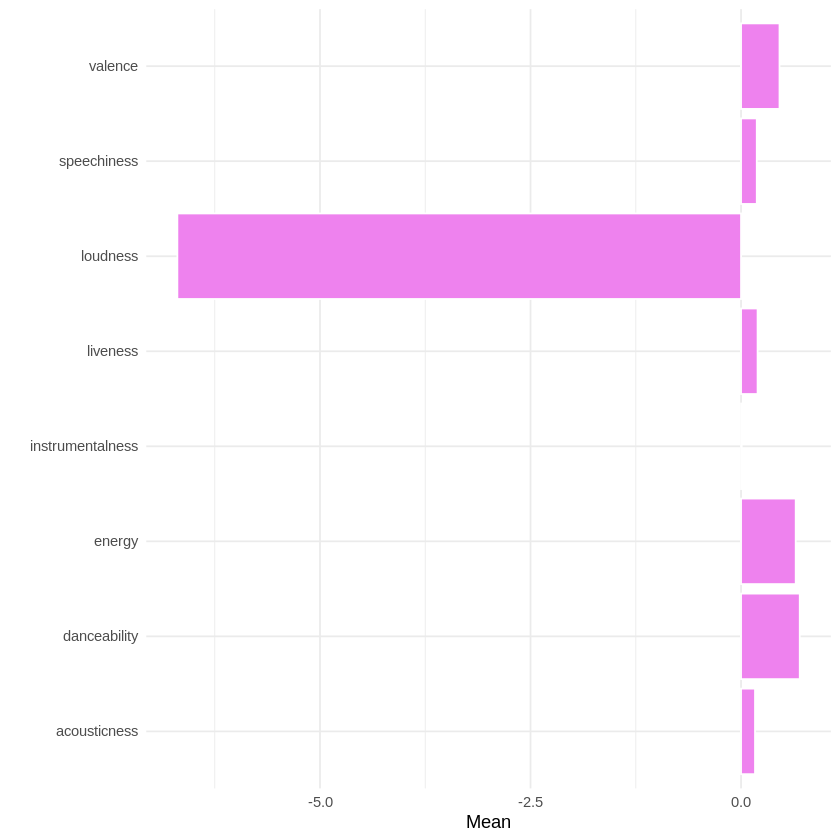

In [164]:
max_means_df <- data.frame(variable = names(max_means), mean = max_means)

ggplot(max_means_df, aes(x = variable, y = mean)) +
  geom_bar(stat = "identity", fill = "violet", color = "white") +
  labs(x = "", y = "Mean") +
  theme_minimal() +
  coord_flip()

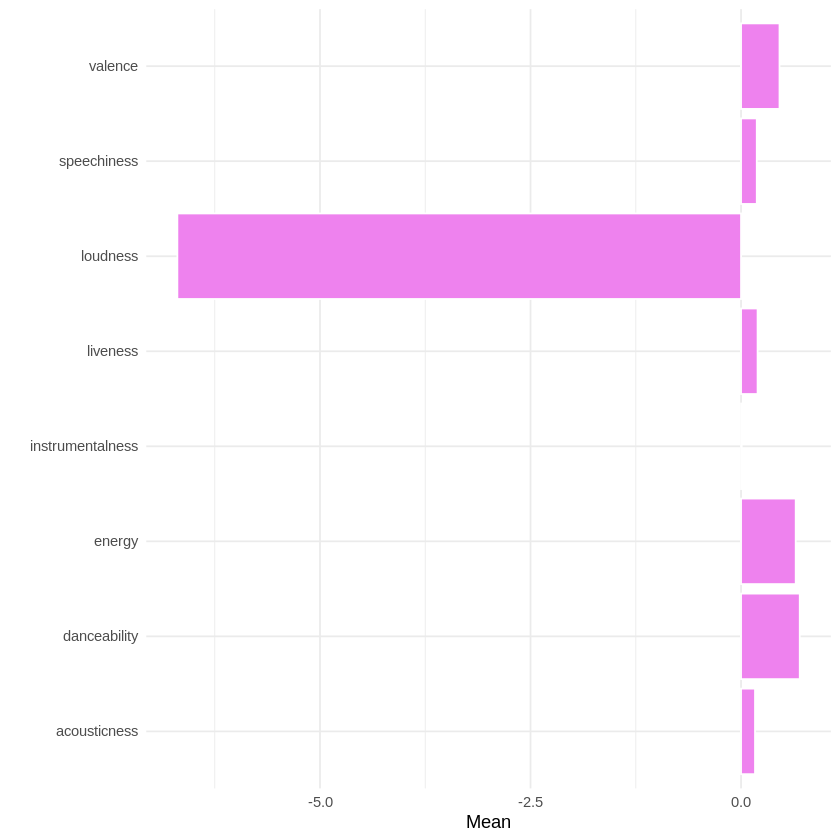

In [166]:
min_means_df <- data.frame(variable = names(min_means), mean = max_means)

ggplot(min_means_df, aes(x = variable, y = mean)) +
  geom_bar(stat = "identity", fill = "violet", color = "white") +
  labs(x = "", y = "Mean") +
  theme_minimal() +
  coord_flip()

### Задание 8
1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [ ]:
df$track_length <- cut(df$duration_ms/1000/60,
breaks=c(0, 3, 5, Inf),
labels=c("short", "medium", "long"),
include.lowest=TRUE)
head(df, n=5)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,track_length
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<fct>
27750,86596,Young Thug,She Wanna Party (feat. Millie Go Lightly),57,0.125000,0.578,-1,0.500,0.00e+00,A#,0.2350,-6.656,Minor,0.2710,104.095,5-Apr,0.388,Rap,NA
18593,86765,empty_field,Easier to Run,47,0.062400,0.545,204173,0.861,0.00e+00,D#,0.1310,-4.819,Minor,0.0340,105.01700000000001,4-Apr,0.279,Alternative,medium
28019,50642,Seether,Country Song,61,0.001150,0.630,229720,0.860,1.19e-06,C,0.2310,-6.117,Major,0.0327,?,4-Apr,0.911,Rap,medium
18177,69478,Starset,Bringing It Down - Version 2.0,45,0.000277,0.363,298062,0.901,1.50e-04,A#,0.0669,-4.961,Minor,0.0843,158.95,4-Apr,0.392,Alternative,medium
16234,67166,Queens of the Stone Age,Feel Good Hit Of The Summer,43,0.017200,0.330,163627,0.922,1.25e-04,B,0.3580,-5.632,Major,0.1720,164.873,4-Apr,0.526,Alternative,short


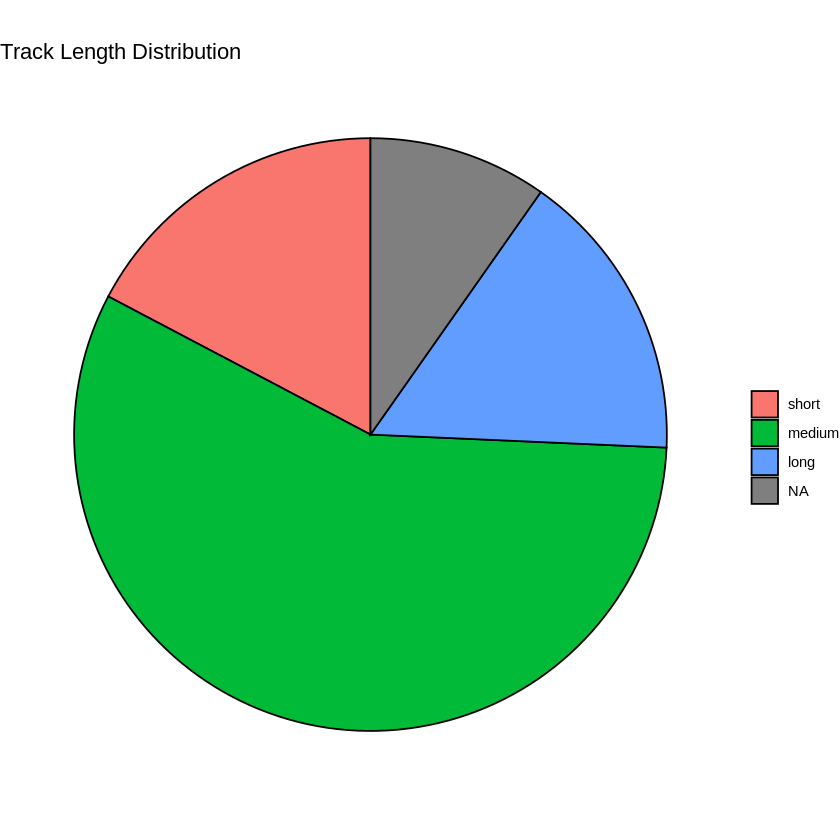

In [159]:
track_len <- levels(factor(df$track_length))
total <- sum(table(df$track_length))

pie_chart <- ggplot(data = df, aes(x = "", fill = track_length)) +
geom_bar(width = 1, color = "black", position = "fill") +
coord_polar(theta = "y") +
ggtitle("Track Length Distribution") +
scale_fill_discrete(name = "") +
theme_void()

print(pie_chart)